In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load MNIST dataset (for regression, let's predict the digit value)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255

# Define a simple neural network model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28*28,)),
        Dense(128, activation='relu'),
        Dense(1)  # Single output node for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True)
mse_scores = []

for train, test in kfold.split(train_images, train_labels):
    model = create_model()
    model.fit(train_images[train], train_labels[train], epochs=10, batch_size=128, verbose=0)
    predictions = model.predict(train_images[test]).flatten()
    mse = np.mean((predictions - train_labels[test])**2)
    mse_scores.append(mse)

# Calculate the mean and standard deviation of the MSE
mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)

print(f"Mean MSE: {mse_mean}, Standard Deviation of MSE: {mse_std}")

2023-11-22 23:38:02.563753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 23:38:02.563781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 23:38:02.564461: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 23:38:02.569284: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 23:38:04.189935: E external/local_xla/xla/

375/375 [==============================] - 0s 562us/step
Mean MSE: 0.7702888250350952, Standard Deviation of MSE: 0.024896010756492615


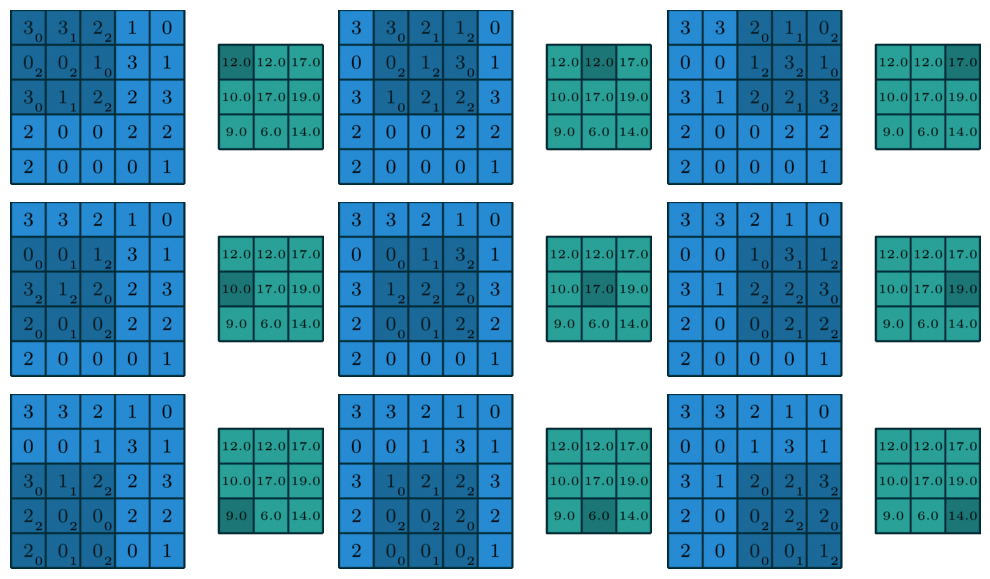

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dimensions of the grid
grid_size = (3, 3)
fig, axs = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 6))

# List of image file paths in the order to display on the grid
image_files = [
    '2dconvolution/frame_0_delay-0.65s.gif',
    '2dconvolution/frame_1_delay-0.65s.gif',
    '2dconvolution/frame_2_delay-0.65s.gif',
    '2dconvolution/frame_3_delay-0.65s.gif',
    '2dconvolution/frame_4_delay-0.65s.gif',
    '2dconvolution/frame_5_delay-0.65s.gif',
    '2dconvolution/frame_6_delay-0.65s.gif',
    '2dconvolution/frame_7_delay-0.65s.gif',
    '2dconvolution/frame_8_delay-0.65s.gif'
]

# Load and display each image on the grid
for idx, img_file in enumerate(image_files):
    # Calculate the grid location
    row = idx // grid_size[1]
    col = idx % grid_size[1]
    
    # Load image
    img = mpimg.imread(f'{img_file}')
    
    # Display image
    axs[row, col].imshow(img)
    axs[row, col].axis('off')  # Turn off axis

# Adjust layout to be tight
plt.tight_layout()
plt.savefig('Ch7cnn_convolve1.png')
plt.show()

In [12]:
import keras
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers

In [13]:
model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
visualkeras.layered_view(model, legend=True) # without custom font

AttributeError: 'ImageFont' object has no attribute 'getsize'

ValueError: Could not save to JPEG for display

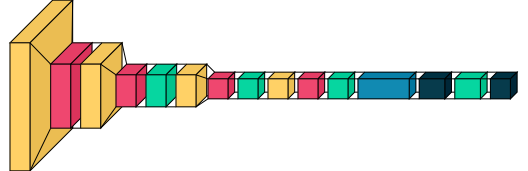

In [20]:
visualkeras.layered_view(model) # without custom font
#from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)
#visualkeras.layered_view(model, legend=True, font=font)

In [25]:
from tensorflow.keras import layers
from collections import defaultdict
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
color_map = defaultdict(dict)#customize the colours
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True, font=font,color_map=color_map)

OSError: cannot open resource

In [2]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
        # create model
        model = Sequential()
        model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
        model.add(MaxPooling2D())
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

ImportError: cannot import name 'np_utils' from 'keras.utils' (/home/a/Anaconda3/lib/python3.11/site-packages/keras/utils/__init__.py)

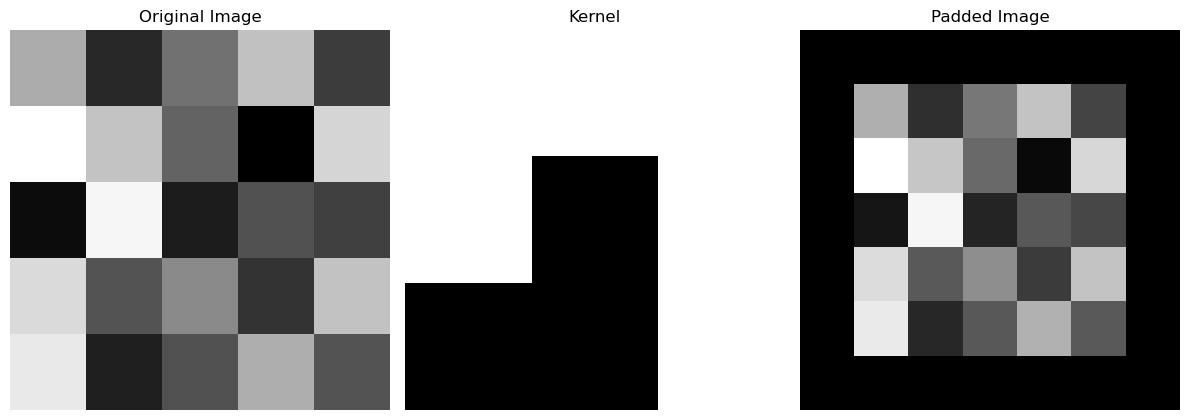

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Create a 5x5 matrix to simulate an image and a 3x3 matrix to simulate a kernel
image = np.random.randint(0, 256, (5, 5))
kernel = np.random.randint(-1, 2, (3, 3))

# Define the padding size
padding_size = 1

# Apply padding to the image
padded_image = np.pad(image, pad_width=padding_size, mode='constant', constant_values=0)

# Create the figure and axes
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

# Plot the original image
ax[0].imshow(image, cmap='gray', interpolation='nearest')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Plot the kernel
ax[1].imshow(kernel, cmap='gray', interpolation='nearest')
ax[1].set_title('Kernel')
ax[1].axis('off')

# Plot the padded image
ax[2].imshow(padded_image, cmap='gray', interpolation='nearest')
ax[2].set_title('Padded Image')
ax[2].axis('off')

# Display the plots
plt.tight_layout()
plt.savefig('Ch7cnn_padding1.png')
plt.show()

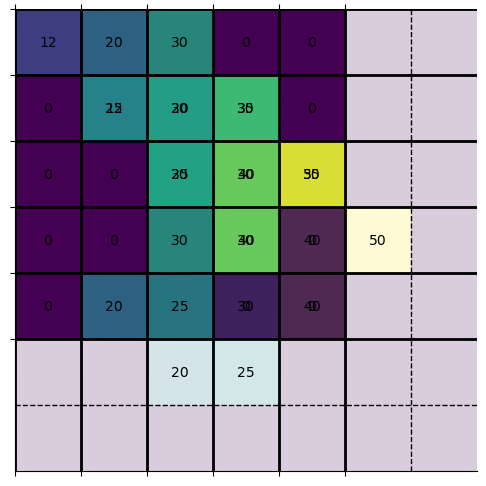

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 5x5 matrix to simulate an image
image = np.array([
    [12, 20, 30, 0, 0],
    [0, 25, 30, 35, 0],
    [0, 0, 30, 40, 50],
    [0, 0, 30, 40, 0],
    [0, 20, 25, 0, 0]
])

# Define the padding size
padding_size = 1

# Apply padding to the image
padded_image = np.pad(image, pad_width=padding_size, mode='constant', constant_values=0)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the original image
ax.matshow(image, cmap='viridis')
for (i, j), val in np.ndenumerate(image):
    ax.text(j, i, val, ha='center', va='center')

# Plot the padded image with dashed lines for the padding
ax.matshow(padded_image, cmap='viridis', alpha=0.2)
for (i, j), val in np.ndenumerate(padded_image):
    if val == 0:  # Only add text for the non-padding cells
        ax.text(j, i, '', ha='center', va='center')
    else:
        ax.text(j, i, val, ha='center', va='center')

# Dashed lines to highlight padding
for i in range(padded_image.shape[0]):
    ax.axhline(i - 0.5, linestyle='--', color='k', linewidth=1)  # horizontal lines
    ax.axvline(i - 0.5, linestyle='--', color='k', linewidth=1)  # vertical lines

# Set ticks position
ax.set_xticks(np.arange(-.5, len(image), 1))
ax.set_yticks(np.arange(-.5, len(image), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Set grid to highlight cells
ax.grid(which='both', color='k', linestyle='-', linewidth=2)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()